# Ładowanie i przygotowanie zbioru danych IMDB

In [1]:
# ładowanie
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 10k najczęstszych słów

In [2]:
# funkcja przygotowująca zbiór danych
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    """Kodowanie sekwencji wartości całkowitoliczbowych do postaci macierzy wartości binarnych."""
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [3]:
# przygotowywanie zbioru danych
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# przygotowanie zbiorów walidacyjnych
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Budowanie i kompilowanie sieci neuronów

In [4]:
from keras import models
from keras import layers

# budowanie
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# kompilowanie
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# binary_crossentropy sprawdza się najlpeiej przy zwracaniu wartości prawdopodobieństwa
# można też użyć mean_squared_error - błąd średniokwadratowy

# Trenowanie modelu

In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5198 - accuracy: 0.7845 - val_loss: 0.4049 - val_accuracy: 0.8523
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3124 - accuracy: 0.9041 - val_loss: 0.3077 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2305 - accuracy: 0.9269 - val_loss: 0.2834 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1823 - accuracy: 0.9408 - val_loss: 0.2810 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1467 - accuracy: 0.9532 - val_loss: 0.2779 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1202 - accuracy: 0.9645 - val_loss: 0.2899 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0995 - accuracy: 0.9706 - val_loss: 0.3105 - val_accuracy: 0.8818
Epoch 8/20
30

# Tworzenie wykresów

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
# przygotowanie danych do wykresu
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

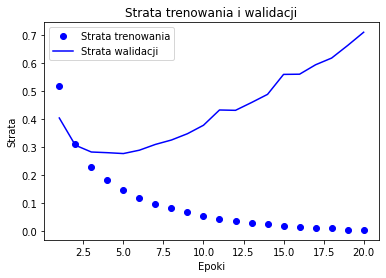

In [14]:
# Wykres strat
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

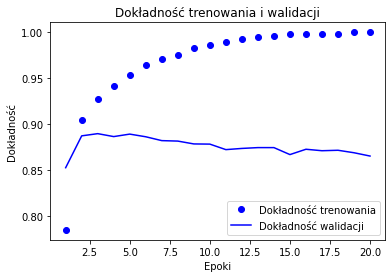

In [16]:
# Wykres dokładności trenowania i walidacji
plt.plot(epochs, acc, 'bo', label='Dokładność trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokładność walidacji')
plt.title('Dokładność trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

# Inne

In [10]:
# odkodowywanie treści opinii
def decoded_review(index_of_review):
    """Dekoduje recenzję o określonym indeksie."""
    word_index = imdb.get_word_index() # przypisuje słowom wartości indeksów
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # przypisuje indeksy do słów
    decoded_review = ' '.join([reverse_word_index.get(id_of_word - 3, '\n') for id_of_word in train_data[index_of_review]])  # dekoduje indeksy na słowa 
    return decoded_review

In [11]:
decoded_review(1)

"\n big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal \n the hair is big lots of boobs \n men wear those cut \n shirts that show off their \n sickening that men actually wore them and the music is just \n trash that plays over and over again in almost every scene there is trashy music boobs and \n taking away bodies and the gym still doesn't close for \n all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"